In [47]:
from mostlyai import MostlyAI
import pandas as pd
from tsl.datasets import AirQuality, MetrLA, PemsBay
from sklearn.model_selection import train_test_split
from Metrics import evaluate_datasets
import os
# get current dir
currentdir = os.getcwd()
print(currentdir)

Generated_path = f'{currentdir}/../../Datasets/GeneratedDatasets/AirQuality/'
TeachForcing_path = f'{currentdir}/../../Datasets/TeachForcingDatasets/'

/Users/paulmagos/Documents/TSGen/Notebooks/Eval


In [48]:
df_AirQuality = AirQuality(impute_nans=True, small=True)
df_AirQuality = df_AirQuality.dataframe()[-5000:].reset_index(drop=True)

df_AirQuality['gen'] = 1

df_AirQuality.columns = df_AirQuality.columns.droplevel('channels')

In [49]:
# syn_AirQuality = pd.read_csv(f'{Generated_path}synteticAirQualityMostlyAI.csv')
syn_AirQuality_dopple = pd.read_csv(f'{Generated_path}synteticAirQualityDGAN.csv')
syn_AirQuality_GTM = pd.read_csv(f'{Generated_path}synteticAirQualityGTM.csv')
syn_AirQuality_GTLSTM = pd.read_csv(f'{Generated_path}synteticAirQualityGTLSTM.csv')
syn_AirQuality_GRGN = pd.read_csv(f'{Generated_path}SynteticAirQualityGRGN.csv')
syn_AirQuality_PAR = pd.read_csv(f'{Generated_path}SynteticAirQualityPam.csv')

# syn_AirQuality.columns = [col.split(",")[0].replace("(", "").replace("'", "") if col != 'gen' else col for col in syn_AirQuality.columns]
# syn_AirQuality_dopple.columns = [col.split(",")[0].replace("(", "").replace("'", "") if col != 'gen' else col for col in syn_AirQuality_dopple.columns]

syn_AirQuality_GRGN['gen'] = 0
syn_AirQuality_GTLSTM['gen'] = 0
syn_AirQuality_GTM['gen'] = 0
syn_AirQuality_PAR['gen'] = 0
syn_AirQuality_dopple['gen'] = 0

In [50]:
results_df = pd.DataFrame()

In [51]:
df_AirQuality.columns = [str(col) for col in df_AirQuality.columns]
syn_AirQuality_GTM.columns = [str(col) for col in syn_AirQuality_GTM.columns]
syn_AirQuality_dopple.columns = [str(col) for col in syn_AirQuality_dopple.columns]
syn_AirQuality_GTLSTM.columns = [str(col) for col in syn_AirQuality_GTLSTM.columns]
syn_AirQuality_GRGN.columns =  [str(col) for col in syn_AirQuality_GRGN.columns]
syn_AirQuality_PAR.columns =  [str(col) for col in syn_AirQuality_PAR.columns]

In [52]:
out = evaluate_datasets(df_AirQuality, df_AirQuality, 'gen')
out['dataset'] = "AirQuality"
out['model'] = "Original"
res = pd.DataFrame(out, ["AirQuality Original"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [53]:
out = evaluate_datasets(df_AirQuality, syn_AirQuality_dopple, 'gen')
out['dataset'] = "AirQuality"
out['model'] = "DGAN"
res = pd.DataFrame(out, ["AirQuality DGAN"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [54]:
out = evaluate_datasets(df_AirQuality, syn_AirQuality_PAR, 'gen')
out['dataset'] = "AirQuality"
out['model'] = "PAR"
res = pd.DataFrame(out, ["AirQuality PAR"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [55]:
out = evaluate_datasets(df_AirQuality, syn_AirQuality_GTM, 'gen')
out['dataset'] = "AirQuality"
out['model'] = "GTM"
res = pd.DataFrame(out, ["AirQuality GTM"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [56]:
out = evaluate_datasets(df_AirQuality, syn_AirQuality_GTLSTM, 'gen')
out['dataset'] = "AirQuality"
out['model'] = "GTLSTM"
res = pd.DataFrame(out, ["AirQuality GTLSTM"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [57]:
out = evaluate_datasets(df_AirQuality, syn_AirQuality_GRGN, 'gen')
out['dataset'] = "AirQuality"
out['model'] = "GRGN"
res = pd.DataFrame(out, ["AirQuality GRGN"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [58]:
results_df['tmp'] = (results_df['inception_score_mean'] - results_df['inception_score_std']).abs()

In [59]:
results_df_AirQuality = results_df[results_df['dataset'] == 'AirQuality'].sort_values(by=['tmp'], ascending=False).reset_index(drop=True)
results_df_AirQuality

,mean,variance,skewness,kurtosis,ks_test,ks_test_p_value,wasserstein_distance,js_divergence,correlation_difference,mmd_linear,mmd_rbf,inception_score_mean,inception_score_std,model_accuracy_train_on_both,model_accuracy_train_on_both_Gen,dataset,model,tmp
0,76.981091,474.506263,0.081873,1.195719,0.349200,2.673078e-169,51.748954,0.597945,0.691265,25608.971798,0.000404,1.837750,0.060551,0.9298,0.984600,AirQuality,GRGN,1.777199
1,72.629537,1.956604,-18.990541,772.066830,0.542570,2.580918e-190,66.854184,0.806596,0.525822,30302.285402,0.966341,1.563959,0.006978,1.0000,0.994006,AirQuality,GTLSTM,1.556982
2,-23.677606,477.653315,0.744670,1.953676,0.792533,5.707548e-115,122.428167,0.478472,0.555383,609453.222893,0.001233,1.557697,0.008087,1.0000,0.946000,AirQuality,DGAN,1.549610
3,97.457532,659.883711,0.011758,0.047335,0.381329,3.101272e-51,50.968145,0.557856,0.722354,9252.142688,0.001203,1.484935,0.039720,0.9766,0.894106,AirQuality,GTM,1.445214
4,73.620794,592.636533,0.045445,2.881796,0.319461,2.003977e-54,53.118348,0.616772,0.741457,25333.949559,0.001204,1.463678,0.037485,0.9962,0.981000,AirQuality,PAR,1.426193
5,97.023438,7938.895020,1.341835,1.728987,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000017,0.000019,1.0000,1.000000,AirQuality,Original,0.999998


In [60]:
results_df = results_df.sort_values(by=['correlation_difference'], ascending=True).reset_index(drop=True)
results_df

,mean,variance,skewness,kurtosis,ks_test,ks_test_p_value,wasserstein_distance,js_divergence,correlation_difference,mmd_linear,mmd_rbf,inception_score_mean,inception_score_std,model_accuracy_train_on_both,model_accuracy_train_on_both_Gen,dataset,model,tmp
0,97.023438,7938.895020,1.341835,1.728987,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000017,0.000019,1.0000,1.000000,AirQuality,Original,0.999998
1,72.629537,1.956604,-18.990541,772.066830,0.542570,2.580918e-190,66.854184,0.806596,0.525822,30302.285402,0.966341,1.563959,0.006978,1.0000,0.994006,AirQuality,GTLSTM,1.556982
2,-23.677606,477.653315,0.744670,1.953676,0.792533,5.707548e-115,122.428167,0.478472,0.555383,609453.222893,0.001233,1.557697,0.008087,1.0000,0.946000,AirQuality,DGAN,1.549610
3,76.981091,474.506263,0.081873,1.195719,0.349200,2.673078e-169,51.748954,0.597945,0.691265,25608.971798,0.000404,1.837750,0.060551,0.9298,0.984600,AirQuality,GRGN,1.777199
4,97.457532,659.883711,0.011758,0.047335,0.381329,3.101272e-51,50.968145,0.557856,0.722354,9252.142688,0.001203,1.484935,0.039720,0.9766,0.894106,AirQuality,GTM,1.445214
5,73.620794,592.636533,0.045445,2.881796,0.319461,2.003977e-54,53.118348,0.616772,0.741457,25333.949559,0.001204,1.463678,0.037485,0.9962,0.981000,AirQuality,PAR,1.426193


In [61]:
df = results_df

# Filter for models that contain "GRGN" in the dataset
# grgn_models = df[df['dataset'].str.contains("GRGN")]
grgn_models = results_df
# Metrics to focus on
metrics_to_compare = ['mean', 'variance', 'ks_test', 'wasserstein_distance', 
                      'js_divergence', 'correlation_difference', 'model_accuracy_train_on_both', 'inception_score_mean']

# Find the minimum for distance-based metrics and the maximum for accuracy/inception-based metrics
best_grgn_models = grgn_models.loc[:, ['dataset', 'model'] + metrics_to_compare].copy()
original = best_grgn_models.loc[best_grgn_models['model'] == 'Original']

# For distance-based metrics, lower is better, so we will look for the minimum values.
# For accuracy-based and inception score-based metrics, higher is better.

# Normalize each metric: for distance-based (lower is better), for accuracy-based (higher is better)
for col in ['mean', 'variance', 'ks_test', 'wasserstein_distance', 
            'js_divergence', 'correlation_difference']:
    best_grgn_models.loc[best_grgn_models['model'] == 'Original', col + '_rank'] = 100
    best_grgn_models.loc[best_grgn_models['model'] != 'Original', col + '_rank'] = best_grgn_models.loc[best_grgn_models['model'] != 'Original', col].rank(ascending=True)

# For accuracy and inception score, higher is better
for col in ['model_accuracy_train_on_both', 'inception_score_mean']:
    best_grgn_models.loc[best_grgn_models['model'] == 'Original', col + '_rank'] = 100
    best_grgn_models.loc[best_grgn_models['model'] != 'Original', col + '_rank'] = best_grgn_models.loc[best_grgn_models['model'] != 'Original', col].rank(ascending=False)

# Calculate total rank
best_grgn_models['total_rank'] = best_grgn_models[[col + '_rank' for col in metrics_to_compare]].sum(axis=1)

# Sort by total rank to find the best overall GRGN model
best_grgn_models = best_grgn_models.sort_values('total_rank').reset_index(drop=True)

# Display the best GRGN model
best_grgn_models

,dataset,model,mean,variance,ks_test,wasserstein_distance,js_divergence,correlation_difference,model_accuracy_train_on_both,inception_score_mean,mean_rank,variance_rank,ks_test_rank,wasserstein_distance_rank,js_divergence_rank,correlation_difference_rank,model_accuracy_train_on_both_rank,inception_score_mean_rank,total_rank
0,AirQuality,GTLSTM,72.629537,1.956604,0.542570,66.854184,0.806596,0.525822,1.0000,1.563959,2.0,1.0,4.0,4.0,5.0,1.0,1.5,2.0,20.5
1,AirQuality,DGAN,-23.677606,477.653315,0.792533,122.428167,0.478472,0.555383,1.0000,1.557697,1.0,3.0,5.0,5.0,1.0,2.0,1.5,3.0,21.5
2,AirQuality,GRGN,76.981091,474.506263,0.349200,51.748954,0.597945,0.691265,0.9298,1.837750,4.0,2.0,2.0,2.0,3.0,3.0,5.0,1.0,22.0
3,AirQuality,GTM,97.457532,659.883711,0.381329,50.968145,0.557856,0.722354,0.9766,1.484935,5.0,5.0,3.0,1.0,2.0,4.0,4.0,4.0,28.0
4,AirQuality,PAR,73.620794,592.636533,0.319461,53.118348,0.616772,0.741457,0.9962,1.463678,3.0,4.0,1.0,3.0,4.0,5.0,3.0,5.0,28.0
5,AirQuality,Original,97.023438,7938.895020,0.000000,0.000000,0.000000,0.000000,1.0000,1.000017,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,800.0


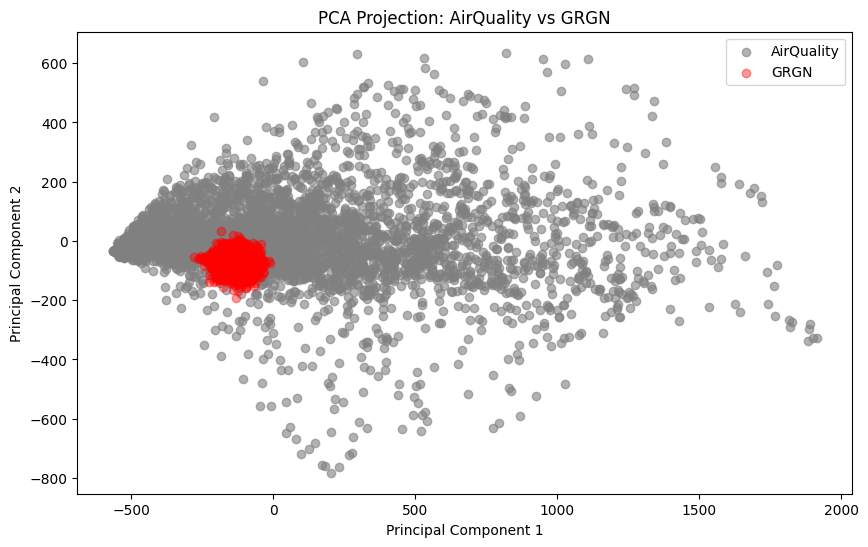

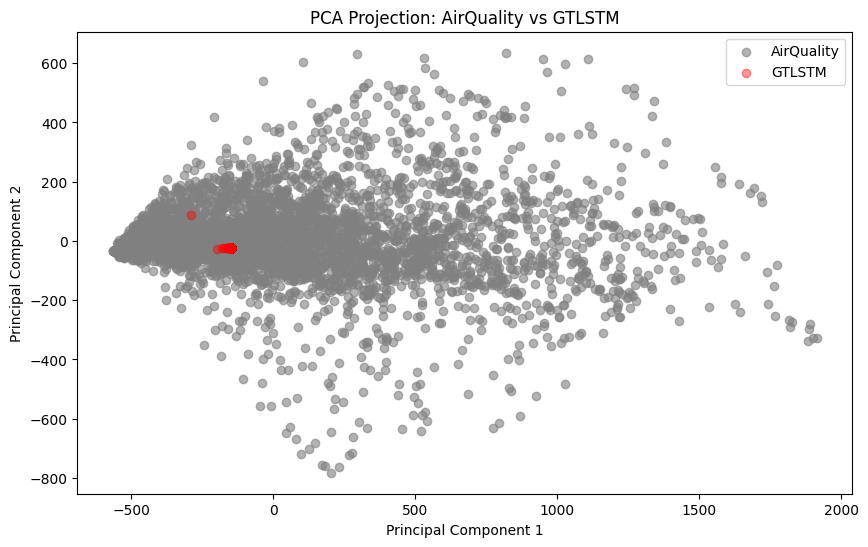

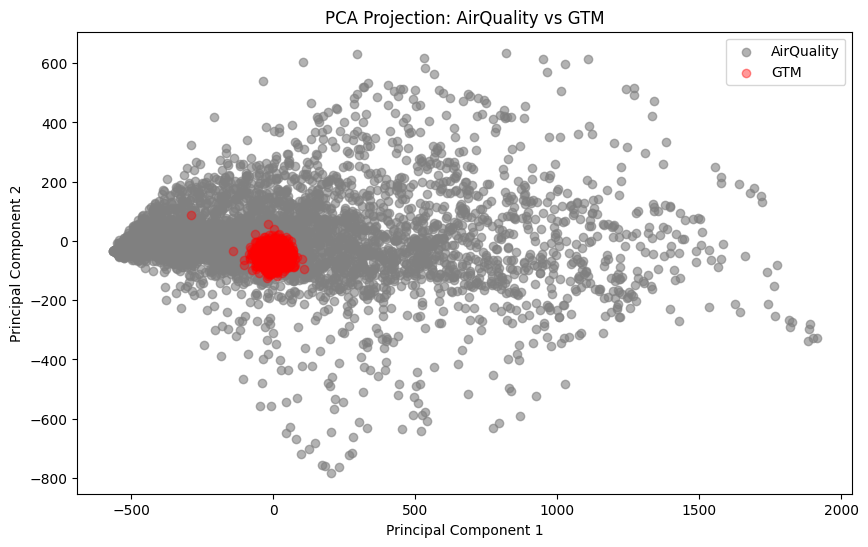

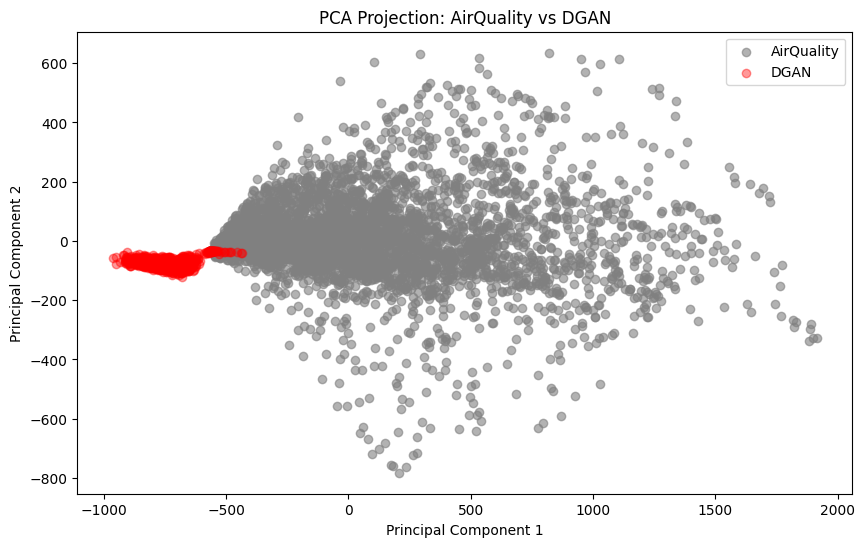

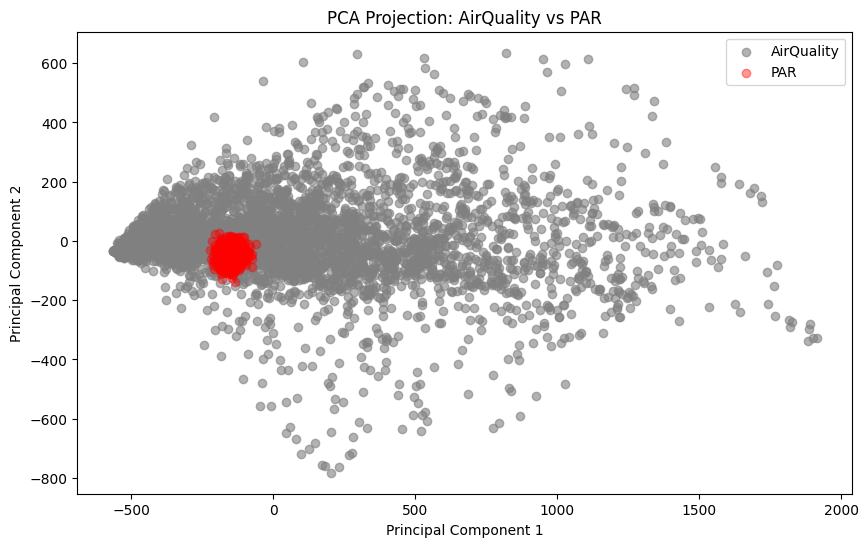

In [62]:
from VisualEval import plot_pca

plot_pca(df_AirQuality, syn_AirQuality_GRGN, 'AirQuality', 'GRGN')
plot_pca(df_AirQuality, syn_AirQuality_GTLSTM, 'AirQuality', 'GTLSTM')
plot_pca(df_AirQuality, syn_AirQuality_GTM, 'AirQuality', 'GTM')
plot_pca(df_AirQuality, syn_AirQuality_dopple, 'AirQuality', 'DGAN')
plot_pca(df_AirQuality, syn_AirQuality_PAR, 'AirQuality', 'PAR')

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


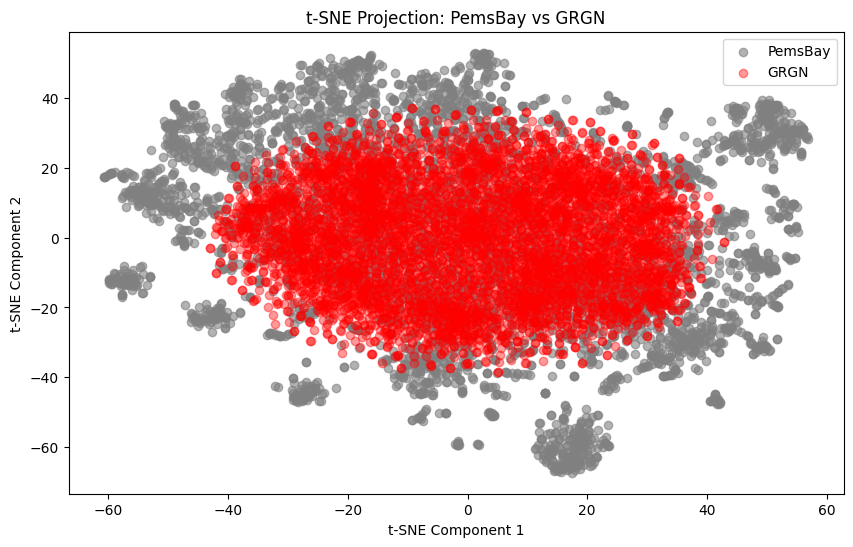

In [63]:
from VisualEval import plot_tsne

plot_tsne(df_AirQuality, syn_AirQuality_GRGN, 'PemsBay', 'GRGN')
# plot_tsne(df_AirQuality, syn_AirQuality_GTLSTM, 'PemsBay', 'GTLSTM')
# plot_tsne(df_AirQuality, syn_AirQuality_GTM, 'PemsBay', 'GTM')
# plot_tsne(df_AirQuality, syn_AirQuality_dopple, 'PemsBay', 'DGAN')
# plot_tsne(df_AirQuality, syn_AirQuality_PAR, 'PemsBay', 'PAR')

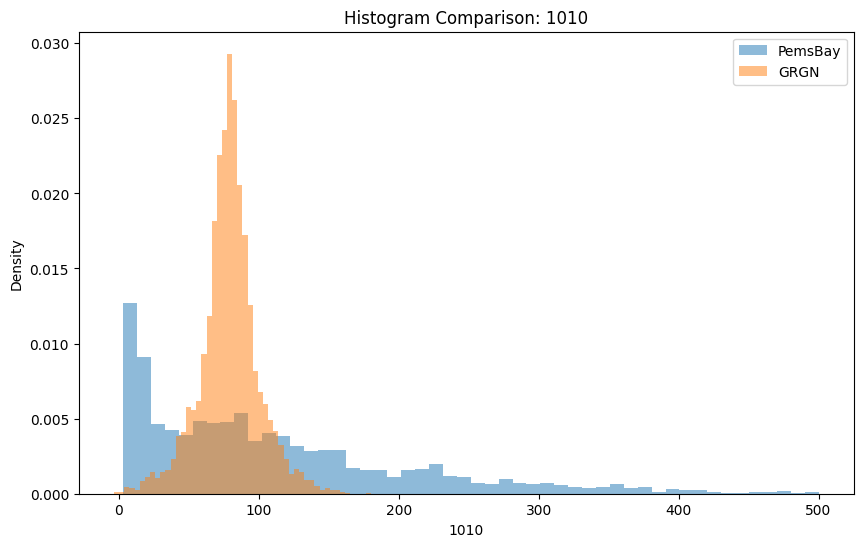

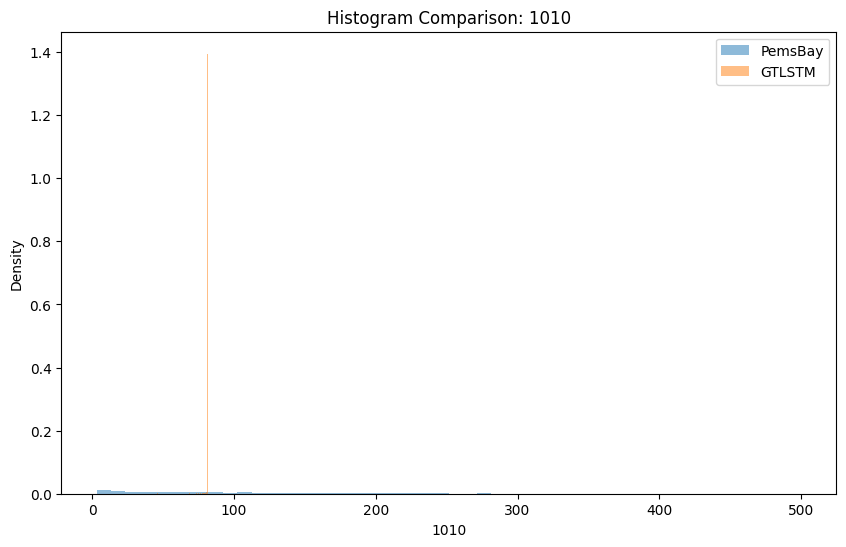

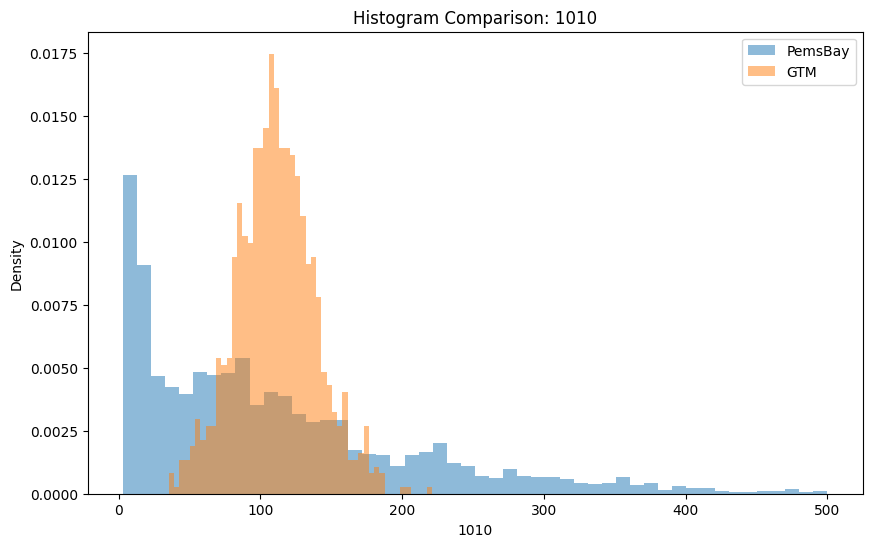

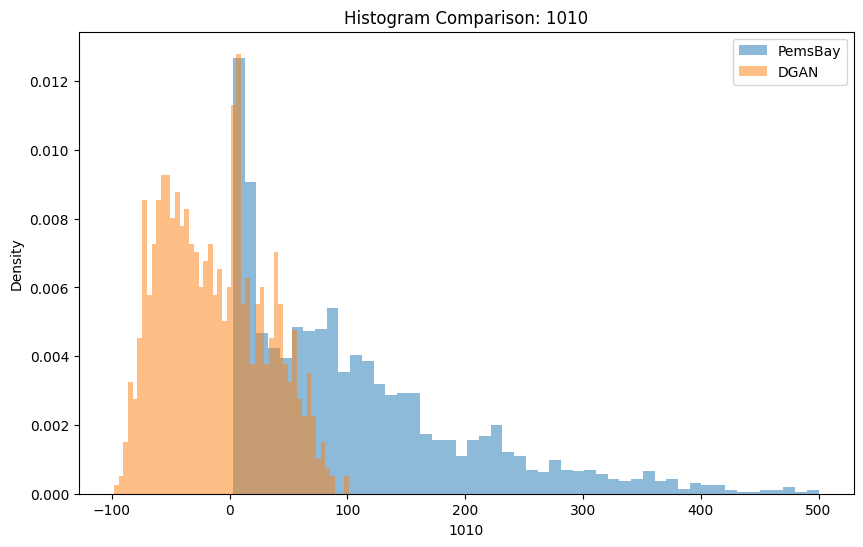

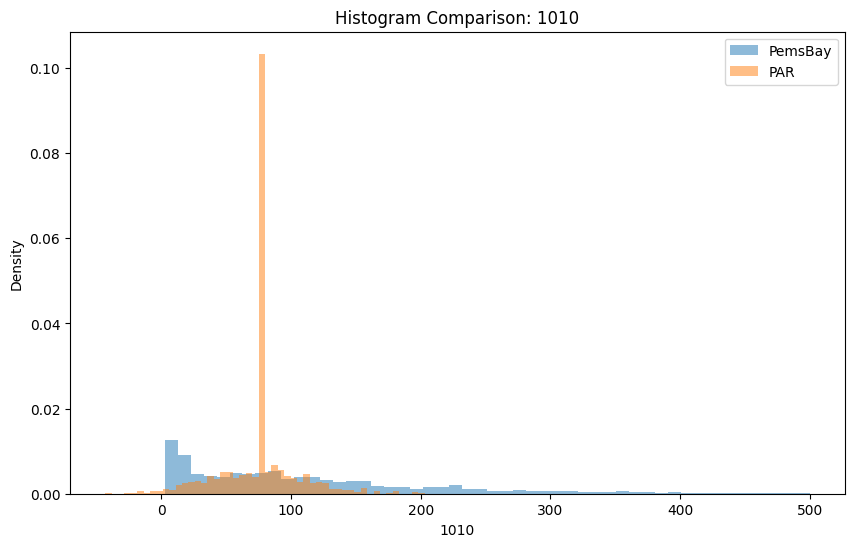

In [64]:
from VisualEval import plot_histograms

plot_histograms(df_AirQuality, syn_AirQuality_GRGN, '1010', 'PemsBay', 'GRGN')
plot_histograms(df_AirQuality, syn_AirQuality_GTLSTM, '1010', 'PemsBay', 'GTLSTM')
plot_histograms(df_AirQuality, syn_AirQuality_GTM, '1010', 'PemsBay', 'GTM')
plot_histograms(df_AirQuality, syn_AirQuality_dopple, '1010', 'PemsBay', 'DGAN')
plot_histograms(df_AirQuality, syn_AirQuality_PAR, '1010', 'PemsBay', 'PAR')

/Users/paulmagos/Documents/TSGen/Notebooks/Eval/VisualEval.py:175: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


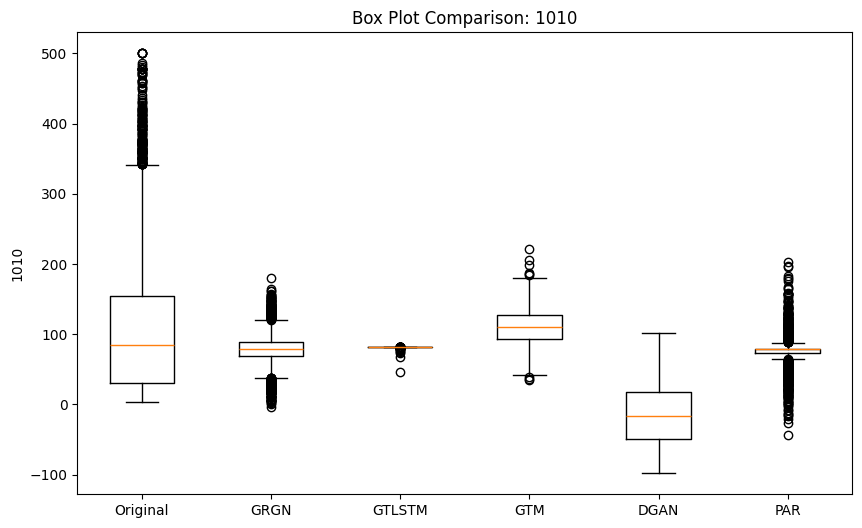

In [65]:
from VisualEval import plot_boxplots_many, plot_boxplots_means, plot_histograms_means

plot_boxplots_many('1010', ('Original', df_AirQuality), 
                   ('GRGN', syn_AirQuality_GRGN), 
                   ('GTLSTM', syn_AirQuality_GTLSTM), 
                   ('GTM', syn_AirQuality_GTM), 
                   ('DGAN', syn_AirQuality_dopple), 
                   ('PAR', syn_AirQuality_PAR))

/Users/paulmagos/Documents/TSGen/Notebooks/Eval/VisualEval.py:202: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


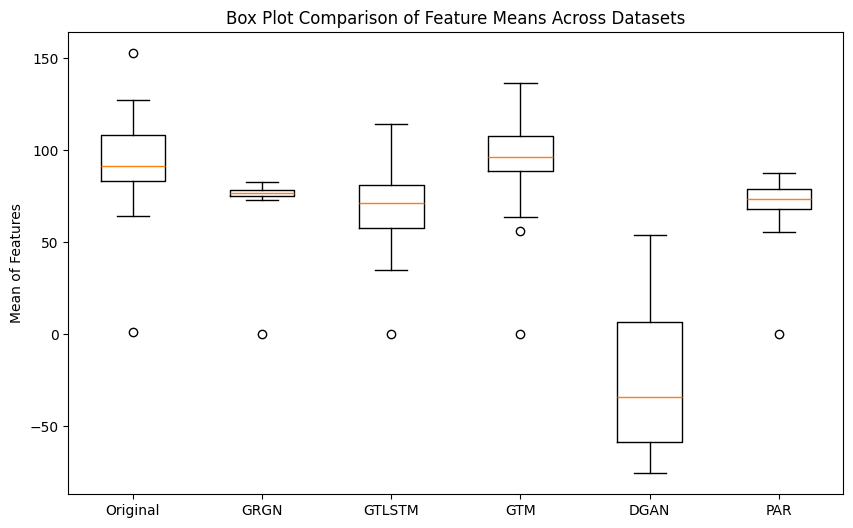

In [66]:
plot_boxplots_means(('Original', df_AirQuality), 
                   ('GRGN', syn_AirQuality_GRGN), 
                   ('GTLSTM', syn_AirQuality_GTLSTM), 
                   ('GTM', syn_AirQuality_GTM), 
                   ('DGAN', syn_AirQuality_dopple), 
                   ('PAR', syn_AirQuality_PAR))

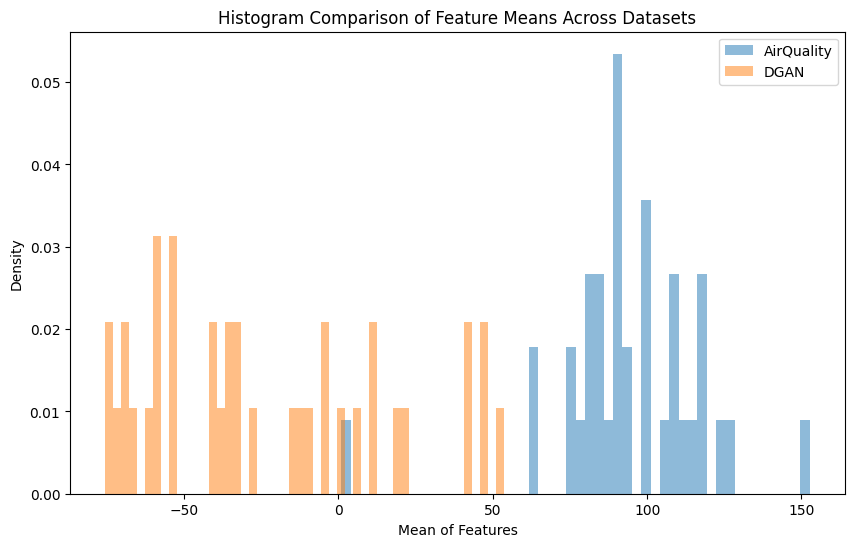

In [67]:
plot_histograms_means(('AirQuality', df_AirQuality), 
                #    ('GRGN', syn_AirQuality_GRGN), 
                  #  ('GTLSTM', syn_PemsBay_GTLSTM), 
                #    ('GTM', syn_AirQuality_GTM),  
                   ('DGAN', syn_AirQuality_dopple), 
                  #  ('PAR', syn_AirQuality_PAR) 
                   )

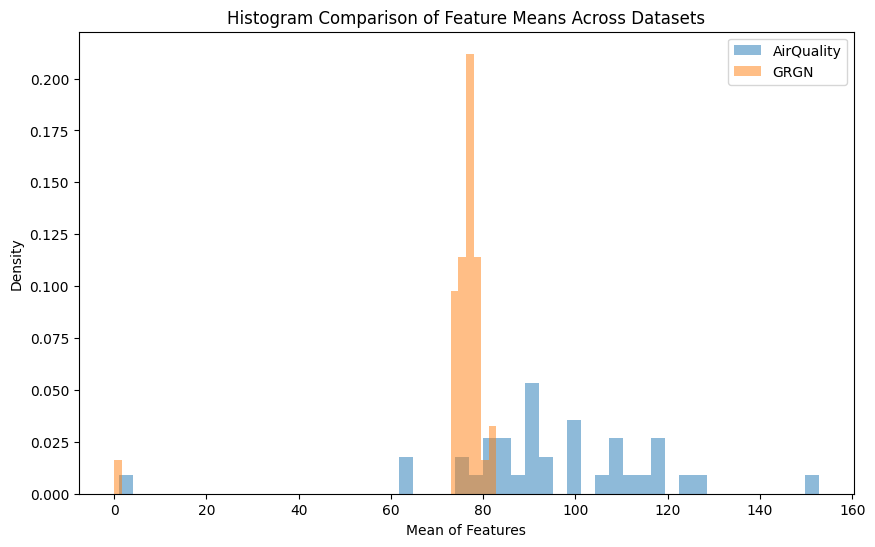

In [68]:
plot_histograms_means(('AirQuality', df_AirQuality), 
                   ('GRGN', syn_AirQuality_GRGN), 
                #    ('GTLSTM', syn_AirQuality_GTLSTM), 
                #    ('GTM', syn_AirQuality_GTM),  
                #    ('DCGAN', syn_AirQuality_dopple), 
                  #  ('PAR', syn_AirQuality_PAR)
                   )

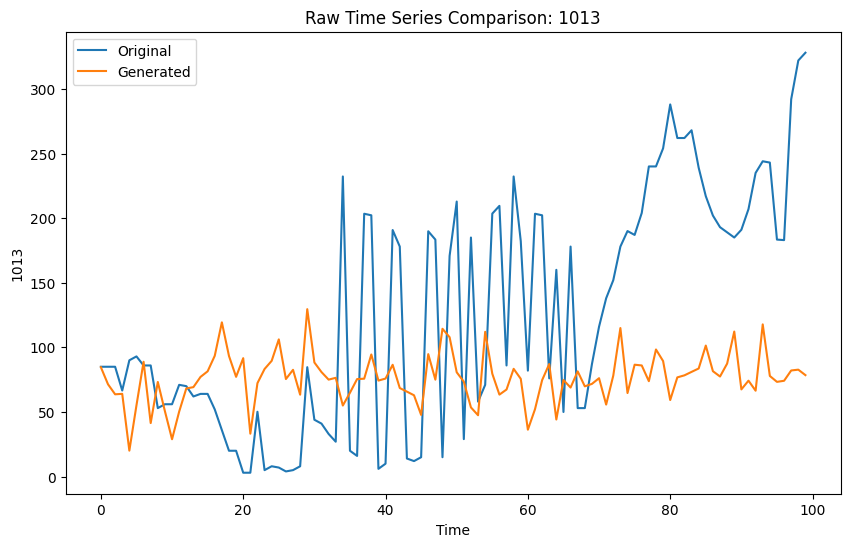

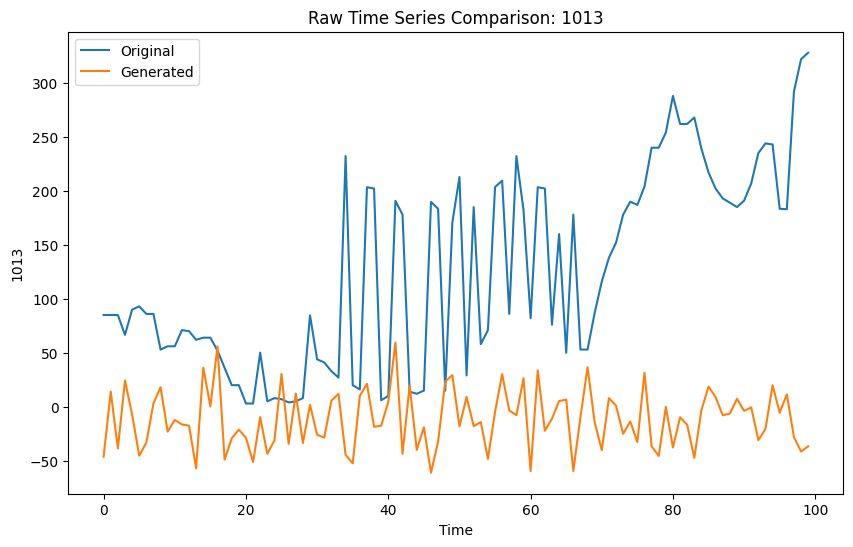

In [69]:
from VisualEval import plot_raw_time_series

plot_raw_time_series(df_AirQuality[-len(df_AirQuality):-(len(df_AirQuality)-100)], syn_AirQuality_GRGN[-len(syn_AirQuality_GRGN):-(len(syn_AirQuality_GRGN)-100)], '1013', 'index')
plot_raw_time_series(df_AirQuality[-len(df_AirQuality):-(len(df_AirQuality)-100)], syn_AirQuality_dopple[-len(syn_AirQuality_dopple):-(len(syn_AirQuality_dopple)-100)], '1013', 'index')